In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
#load dataset
train_df=pd.read_csv("train (1).csv")
test_df=pd.read_csv("test (1).csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#shape of data
print("shape of train data {}".format(train_df.shape))
print("shape of train data {}".format(test_df.shape))

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**DATA DESCRIPTION:**
1.Survived-(0:No,1:Yes)
2.Pclass-Passenger Class(1:1st,2:2nd,3:3rd)
3.Name-Name of the Passenger
4.Sex-Sex of the Passenger 
5.Age-Age of Passenger
6.SibSp-Number of sibling/Spouse
7.Parch-Number of Parents/Children
8.Ticket-Ticket Number
9.Fare-Passenger Fare
10.Cabin- Cabin
11.Embarked-Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that count for Age column is 714 i.e. there is some missing values so before exploring the data set we have to clean the data.

**DATA CLEANING:**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I can see that there is some missing values in 'Age','Cabin'and 'Embarked'. As Cabin has lots of missing value so i will drop this column and there are many columns which are not needed for our analysis so i will drop them also.

In [11]:
train_df=train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**DATA EXPLORATION**

In [12]:
#correlation of other attributes with Survival
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

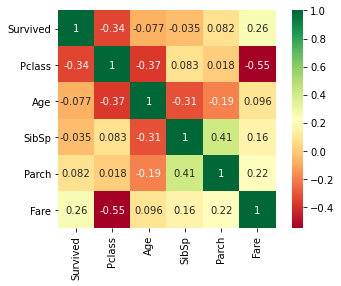

In [16]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',square=True)

We can see that there is negative correlation betweeen Pclass and Survived passengers i.e. class 1 has better survival than other classes.

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Passengers Survived')

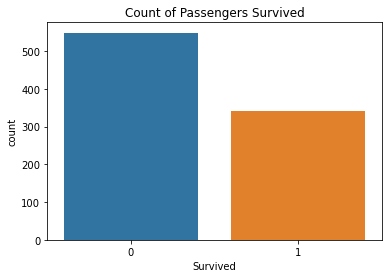

In [15]:
#counts of survived passengers 
sns.countplot('Survived',data=train_df)
plt.title('Count of Passengers Survived')

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of Passengers')

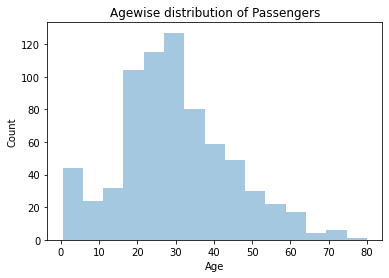

In [17]:
#Histgram for Age 
#Agewise Distribution 
sns.distplot(train_df['Age'].dropna(),bins=15,kde=False)
plt.ylabel('Count')
plt.title("Agewise distribution of Passengers")

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


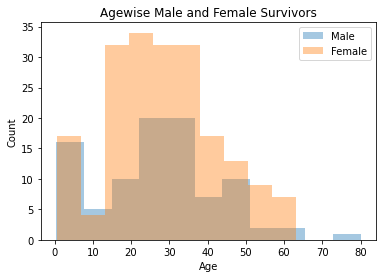

In [19]:
#Agewise distribution of male and female survivors 
sns.distplot(train_df['Age'][(train_df['Sex']=='male')&(train_df['Survived']==1)].dropna(),label='Male',kde=False)
sns.distplot(train_df['Age'][(train_df['Sex']=='female')&(train_df['Survived']==1)].dropna(),label='Female',kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Agewise Male and Female Survivors')
plt.legend()

We can see that feamales had better survival chance.

In [23]:
#role of class in survival
group_byclass=train_df.groupby(['Pclass','Survived','Sex'])
group_byclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [24]:
#Survival rate in all three classes
train_df.groupby(['Pclass'])['Survived'].sum()/train_df.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

We can see that Class played a role in survival of Passengers.Now by using vsualization-

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Class and gender wise segregation of passengers')

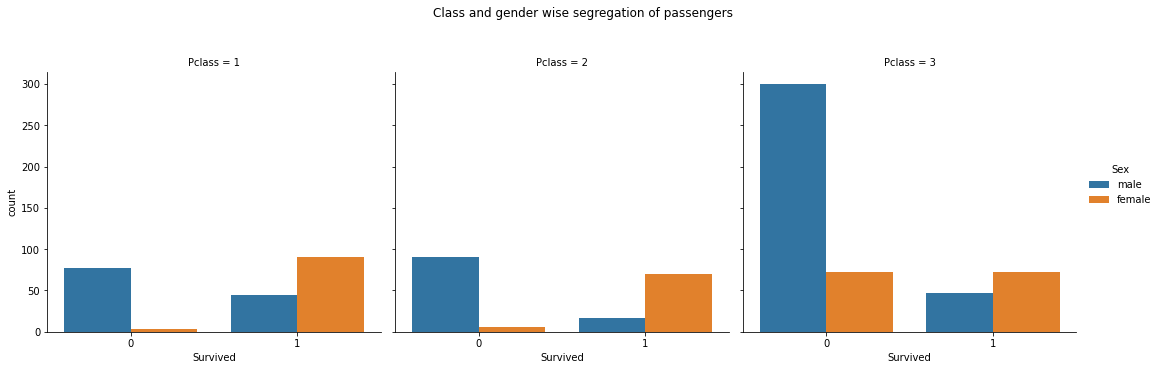

In [28]:
sns.factorplot('Survived', col='Pclass',hue='Sex',data=train_df,kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Class and gender wise segregation of passengers')

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot of passengers w.r.t Fare and Age')

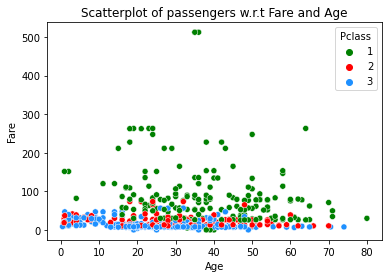

In [32]:
#how fare is related with age and pclass 
sns.scatterplot('Age','Fare',hue='Pclass',data=train_df,palette=['green','red','dodgerblue'])
plt.title('Scatterplot of passengers w.r.t Fare and Age')

C:\Users\akanksha\OneDrive\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

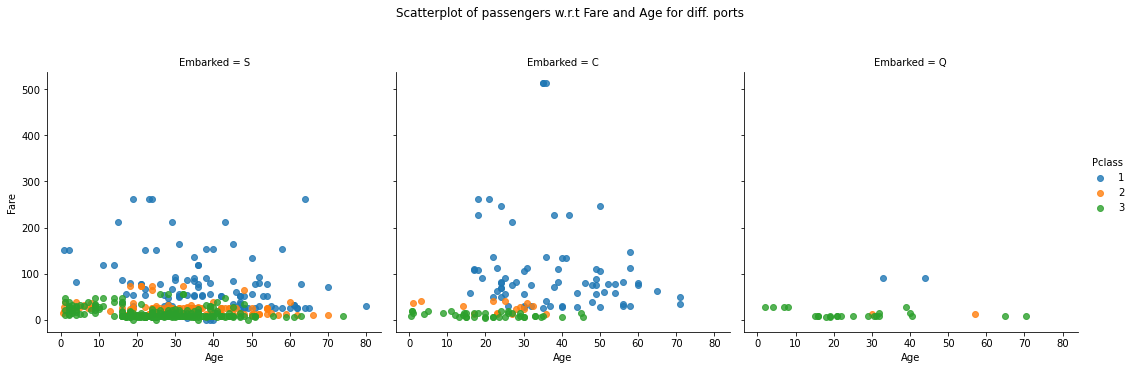

In [34]:
sns.lmplot('Age', 'Fare', data=train_df, fit_reg=False, hue="Pclass", col="Embarked")
plt.subplots_adjust(top=0.8)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports')

We can see that lot of passengers embarked from port of Southampton and fare for calss 2 and 3 almost uniform across all ages.

**CONCLUSION:**
From my exploratory data analysis i can see that females had higher chance of survival and i can also see that Class of Passengers also played a role in their survival. We can explore  this data more than i have done.